## 实验操作1.2  波段运算--以计算NDVI为例
* 实验目的：计算影像NDVI并保存，查看NDVI影像及其直方图
* 实验数据：ENVI5.3自带的bhtmref.img文件

In [1]:
#导入所需库函数以及安装包
import os  #导入操作系统接口模块
import numpy as np  #数组
import spectral
from spectral import * #用于读取.img格式的文件
import matplotlib.pyplot as plt # plt 用于显示图片
import matplotlib
plt.rcParams['font.sans-serif']=['SimHei']   # 用黑体显示中文
plt.rcParams['axes.unicode_minus']=False     # 正常显示负号

In [2]:
#①读入数据
#读入ENVI5.3自带的bhtmref.img文件
path='D:/Program Files/Exelis/ENVI53/classic/data/bhtmref.hdr'# path为bhtmref.img文件的路径，可根据实际文件路径进行修改
Img_source= envi.open(path)# 这里通过读取bhtmref.img的头文件bhtmref.hdr打开图像
Img= Img_source.open_memmap(writeable = True)

In [3]:
#②计算NDVI
#获取近红外与红波段数据，计算NDVI,bhtmref.img共有6个波段，其中第3和第4波段分别为红与近红外波段，
#由于数组序号从0开始，则红与近红外波段序号分别为2和3
RED= Img[:,:,2]#获取红波段RED
NIR= Img[:,:,3]#获取近红外波段NIR
NDVI=(NIR-RED)/(NIR+RED)#计算NDVI,NDVI=(NIR-RED)/(NIR+RED)
#至此，NDVI已经计算完成

In [4]:
#③写出数据
#save_path为保存路径，可以根据实际情况进行修改
save_path='C:/Users/Think/Desktop'
fname = os.path.join(save_path, 'NDVI.hdr')
envi.save_image(fname, NDVI, interleave='BSQ')#将计算好的NDVI影像保存至save_path路径中

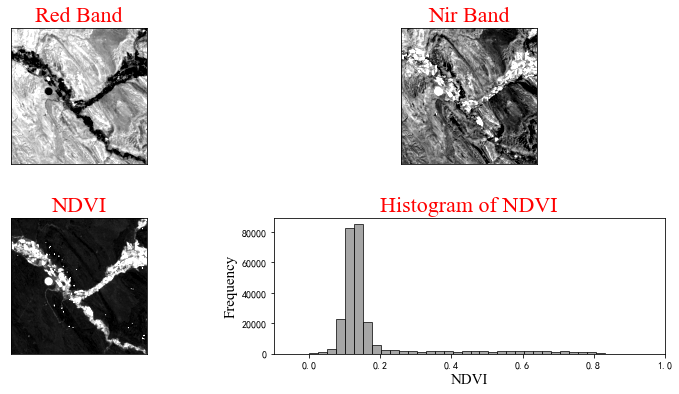

In [5]:
#④显示影像
#显示NDVI数据
#显示NDVI灰度图像
figsize =14,6
figure,((axes1, axes2),(axes3,axes4)) = plt.subplots(2,2,figsize=figsize)
#figure.tight_layout()#调整整体空白
plt.subplots_adjust(wspace =0.0, hspace =0.4)#调整子图间距
font= {'family': 'Times New Roman',
       'weight': 'normal',
       'color': 'red',
       'size': 22
      } #设置字体，这里采用 Times New Roman

# 注意：显示影像灰度图，采用5%-95% 灰度拉伸显示
axes1.imshow(RED,cmap='gray',vmin=np.percentile(RED, 5),vmax=np.percentile(RED, 95)) #显示红波段影像
axes1.set_title("Red Band",font)
axes2.imshow(NIR,cmap="gray",vmin=np.percentile(NIR, 5),vmax=np.percentile(NIR, 95)) #显示近红外波段影像
axes2.set_title("Nir Band",font)
axes3.imshow(NDVI,cmap="gray",vmin=np.percentile(NDVI, 5),vmax=np.percentile(NDVI, 95)) #显示NDVI影像
axes3.set_title("NDVI",font)

# 不显示坐标轴
axes1.get_yaxis().set_visible(False)
axes1.get_xaxis().set_visible(False)
axes2.get_yaxis().set_visible(False)
axes2.get_xaxis().set_visible(False)
axes3.get_yaxis().set_visible(False)
axes3.get_xaxis().set_visible(False)

#绘制NDVI的频数直方图
font2= {'family': 'Times New Roman',
        'weight': 'normal',
        'color': 'black',
        'size': 15
       } #设置字体，这里采用 Times New Roman
axes4.hist(NDVI.flatten(), bins = 1000, facecolor="gray", edgecolor="black", alpha=0.7)
axes4.set_xlabel("NDVI",font2) # 显示横轴标签
axes4.set_xlim([-0.1,1])
axes4.set_ylabel("Frequency",font2) # 设置纵轴标签
axes4.set_title("Histogram of NDVI",font) # 设置图标题
plt.show()